In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
standardization = lambda x: StandardScaler().fit_transform(x)
from sklearn.model_selection import train_test_split as tts

In [129]:
data = pd.read_csv("weather_csv.csv")
data.head()

,STN---,WBAN,YEARMODA,TEMP,,DEWP,.1,SLP,.2,STP,...,.4,WDSP,.5,MXSPD,GUST,MAX,MIN,PRCP,SNDP,FRSHTT
0,107380,99999,19410201,33.4,5,31.0,5,1002.4,5,9999.9,...,5,2.0,5,5.1,999.9,37.0,25.0,0.47F,999.9,11000
1,107380,99999,19410202,31.6,5,26.5,5,1007.9,5,9999.9,...,5,12.4,5,18.1,999.9,36.0,28.0*,0.08F,999.9,1000
2,107380,99999,19410203,29.4,5,22.0,5,999.2,5,9999.9,...,5,8.2,5,13.0,999.9,34.0,27.0,0.01E,999.9,0
3,107380,99999,19410204,23.8,5,21.2,5,1016.0,5,9999.9,...,5,13.0,5,13.0,999.9,25.0,23.0,0.02E,999.9,1000
4,107380,99999,19410205,19.4,5,16.4,5,1021.7,5,9999.9,...,5,3.0,5,5.1,999.9,21.0,18.0,0.06F,999.9,1000


In [130]:
data.dtypes

STN---         int64
WBAN           int64
 YEARMODA      int64
   TEMP      float64
               int64
   DEWP      float64
  .1           int64
  SLP        float64
  .2           int64
  STP        float64
  .3           int64
 VISIB       float64
  .4           int64
  WDSP       float64
  .5           int64
 MXSPD       float64
  GUST       float64
   MAX        object
  MIN         object
PRCP          object
SNDP         float64
 FRSHTT        int64
dtype: object

In [132]:
data = data.dropna()

In [133]:
data['PRCP  '] = data['PRCP  '].str.replace('F', '')
data['PRCP  '] = data['PRCP  '].str.replace('E', '')
data['PRCP  '] = data['PRCP  '].str.replace('I', '')
data['PRCP  '] = data['PRCP  '].str.replace('G', '')
data['PRCP  '] = data['PRCP  '].str.replace('H', '')
data['PRCP  '] = data['PRCP  '].str.replace('A', '')
data['PRCP  '] = data['PRCP  '].str.replace('D', '')
data['PRCP  '] = data['PRCP  '].str.replace('C', '')
data['PRCP  '] = data['PRCP  '].str.replace('B', '')

In [134]:
data['   MAX  '] = data['   MAX  '].str.replace('*', '')
data['  MIN  '] = data['  MIN  '].str.replace('*', '')

In [135]:
data.head()

,STN---,WBAN,YEARMODA,TEMP,,DEWP,.1,SLP,.2,STP,...,.4,WDSP,.5,MXSPD,GUST,MAX,MIN,PRCP,SNDP,FRSHTT
0,107380,99999,19410201,33.4,5,31.0,5,1002.4,5,9999.9,...,5,2.0,5,5.1,999.9,37.0,25.0,0.47,999.9,11000
1,107380,99999,19410202,31.6,5,26.5,5,1007.9,5,9999.9,...,5,12.4,5,18.1,999.9,36.0,28.0,0.08,999.9,1000
2,107380,99999,19410203,29.4,5,22.0,5,999.2,5,9999.9,...,5,8.2,5,13.0,999.9,34.0,27.0,0.01,999.9,0
3,107380,99999,19410204,23.8,5,21.2,5,1016.0,5,9999.9,...,5,13.0,5,13.0,999.9,25.0,23.0,0.02,999.9,1000
4,107380,99999,19410205,19.4,5,16.4,5,1021.7,5,9999.9,...,5,3.0,5,5.1,999.9,21.0,18.0,0.06,999.9,1000


In [136]:
data['PRCP  '] = data['PRCP  '].astype('float64')
data['   MAX  '] = data['   MAX  '].astype('float64')
data['  MIN  '] = data['  MIN  '].astype('float64')

In [137]:
data['PRCP  '] = standardization(data['PRCP  '].values.reshape(-1, 1))

In [138]:
data.dtypes

STN---         int64
WBAN           int64
 YEARMODA      int64
   TEMP      float64
               int64
   DEWP      float64
  .1           int64
  SLP        float64
  .2           int64
  STP        float64
  .3           int64
 VISIB       float64
  .4           int64
  WDSP       float64
  .5           int64
 MXSPD       float64
  GUST       float64
   MAX       float64
  MIN        float64
PRCP         float64
SNDP         float64
 FRSHTT        int64
dtype: object

In [139]:
x = data.drop(["PRCP  "], axis=1)
y = data['PRCP  ']

In [140]:
train_x, test_x, train_y, test_y = tts(x, y, test_size=0.2, random_state=52)

In [141]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [142]:
data.head()

,STN---,WBAN,YEARMODA,TEMP,,DEWP,.1,SLP,.2,STP,...,.4,WDSP,.5,MXSPD,GUST,MAX,MIN,PRCP,SNDP,FRSHTT
0,107380,99999,19410201,33.4,5,31.0,5,1002.4,5,9999.9,...,5,2.0,5,5.1,999.9,37.0,25.0,-0.373444,999.9,11000
1,107380,99999,19410202,31.6,5,26.5,5,1007.9,5,9999.9,...,5,12.4,5,18.1,999.9,36.0,28.0,-0.385074,999.9,1000
2,107380,99999,19410203,29.4,5,22.0,5,999.2,5,9999.9,...,5,8.2,5,13.0,999.9,34.0,27.0,-0.387161,999.9,0
3,107380,99999,19410204,23.8,5,21.2,5,1016.0,5,9999.9,...,5,13.0,5,13.0,999.9,25.0,23.0,-0.386863,999.9,1000
4,107380,99999,19410205,19.4,5,16.4,5,1021.7,5,9999.9,...,5,3.0,5,5.1,999.9,21.0,18.0,-0.385670,999.9,1000


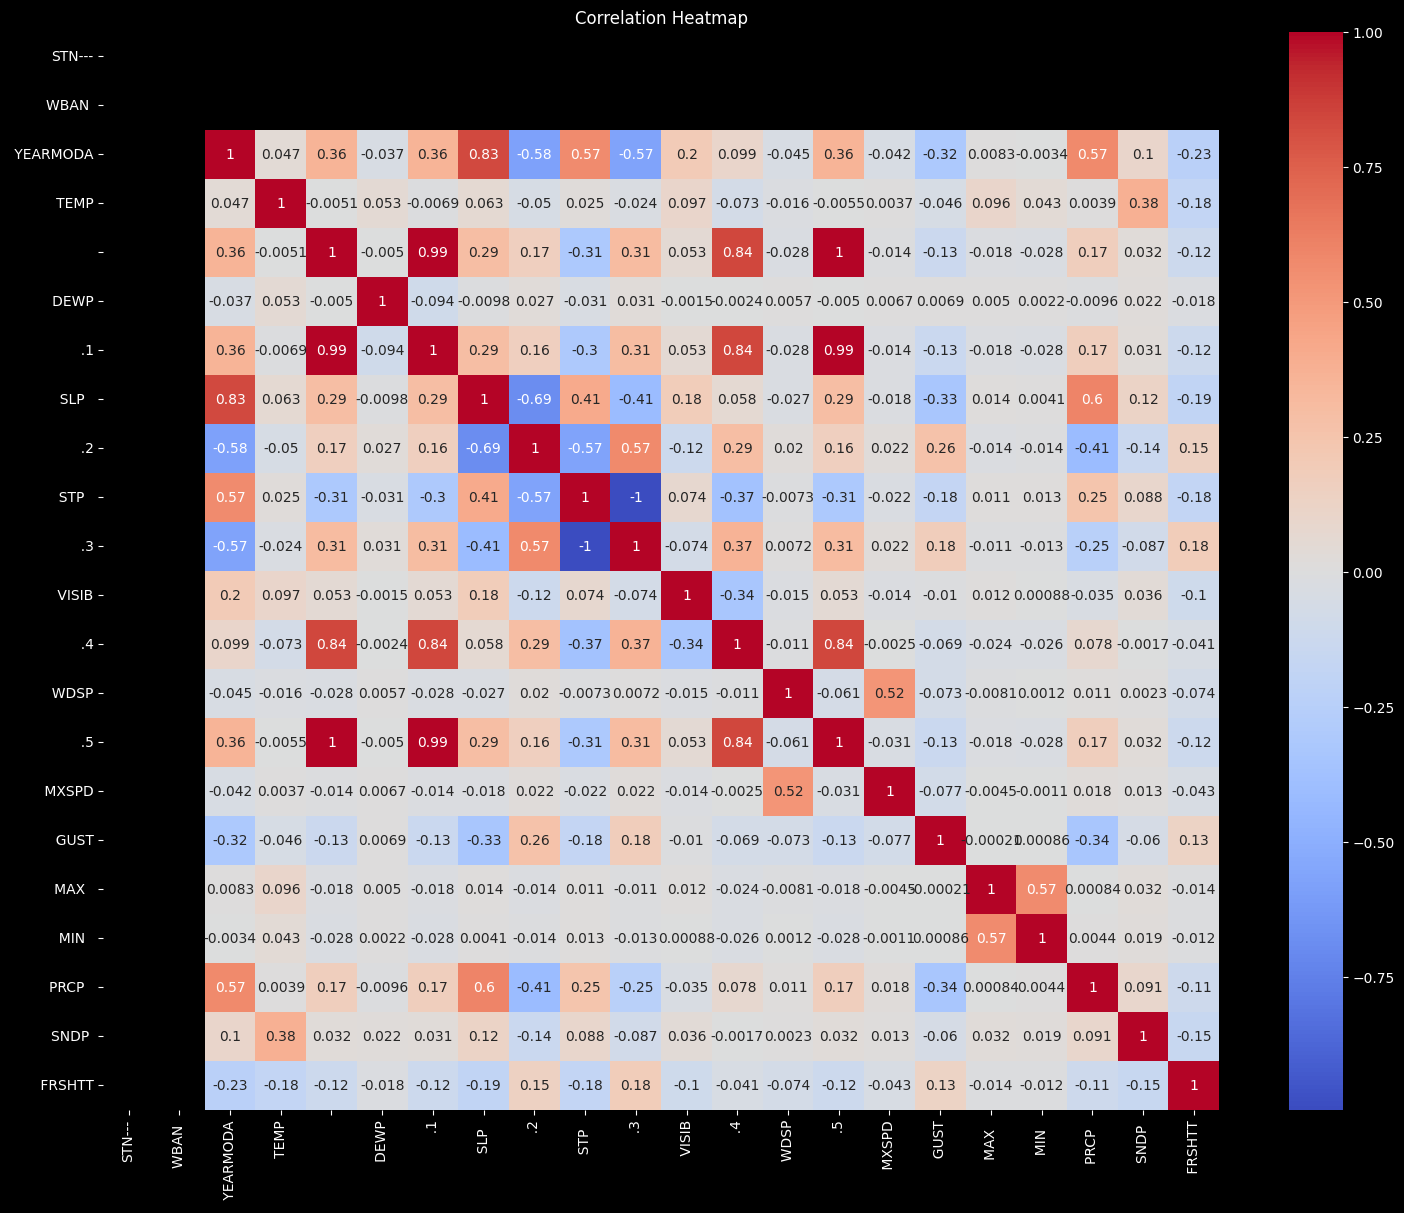

In [143]:
correlation_matrix = data.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [144]:
lrm = lr().fit(train_x, train_y)
prdlr = lrm.predict(test_x)
mselr = mean_squared_error(test_y, prdlr)
#aclr = accuracy_score(test_x, prdlr)
r2lr = r2_score(test_y, prdlr)
print(mselr)
#print(aclr)
print(r2lr)

0.5767194272361438
0.4251029608588689


In [145]:
dtr = DecisionTreeRegressor().fit(train_x, train_y)
prddt = dtr.predict(test_x)
msedt = mean_squared_error(test_y, prddt)
r2dt = r2_score(test_y, prddt)
print(msedt)
print(r2dt)

0.05825332142152572
0.941930754499


In [146]:
rfr = RandomForestRegressor(n_estimators=100, random_state=18).fit(train_x, train_y)
prdrf = rfr.predict(test_x)
mserf = mean_squared_error(test_y, prdrf)
r2rf = r2_score(test_y, prdrf)
print(mserf)
print(r2rf)

0.03132359307370956
0.968775387020275


In [147]:
rfr = RandomForestRegressor(n_estimators=200, random_state=18).fit(train_x, train_y)
prdrf = rfr.predict(test_x)
mserf = mean_squared_error(test_y, prdrf)
r2rf = r2_score(test_y, prdrf)
print(mserf)
print(r2rf)

0.031241769375693274
0.9688569521618319


In [148]:
rfr = RandomForestRegressor(n_estimators=300, random_state=18).fit(train_x, train_y)
prdrf = rfr.predict(test_x)
mserf = mean_squared_error(test_y, prdrf)
r2rf = r2_score(test_y, prdrf)
print(mserf)
print(r2rf)

0.031269182968451346
0.968829625193874


In [149]:
rfr = RandomForestRegressor(n_estimators=400, random_state=18).fit(train_x, train_y)
prdrf = rfr.predict(test_x)
mserf = mean_squared_error(test_y, prdrf)
r2rf = r2_score(test_y, prdrf)
print(mserf)
print(r2rf)

0.0312161316198678
0.9688825089043626


In [150]:
rfr = RandomForestRegressor(n_estimators=500, random_state=18).fit(train_x, train_y)
prdrf = rfr.predict(test_x)
mserf = mean_squared_error(test_y, prdrf)
r2rf = r2_score(test_y, prdrf)
print(mserf)
print(r2rf)

0.0312818155812956
0.9688170324990941


In [151]:
rfr = RandomForestRegressor(n_estimators=600, random_state=18).fit(train_x, train_y)
prdrf = rfr.predict(test_x)
mserf = mean_squared_error(test_y, prdrf)
r2rf = r2_score(test_y, prdrf)
print(mserf)
print(r2rf)

0.031252791145744384
0.9688459652197086


In [155]:
knn = KNeighborsRegressor().fit(train_x, train_y)
prdknn = knn.predict(test_x)
mseknn = mean_squared_error(test_y, prdknn)
r2knn = r2_score(test_y, prdknn)
print(mseknn)
print(r2knn)

0.030046366602079044
0.9700485775565675


In [156]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor().fit(train_x, train_y)
prdgbr = gbr.predict(test_x)
msegbr = mean_squared_error(test_y, prdgbr)
r2gbr = r2_score(test_y, prdgbr)
print(msegbr)
print(r2gbr)

0.031733653657578
0.9683666221956457


In [157]:
from sklearn.svm import SVR
svr = SVR().fit(train_x, train_y)
prdsvr = svr.predict(test_x)
msesvr = mean_squared_error(test_y, prdsvr)
r2svr = r2_score(test_y, prdsvr)
print(msesvr)
print(r2svr)

1.023966439791408
-0.02073078626312097


In [158]:
from sklearn.linear_model import SGDRegressor
sgr = SGDRegressor().fit(train_x, train_y)
prdsgr = sgr.predict(test_x)
msesgr = mean_squared_error(test_y, prdsgr)
r2sgr = r2_score(test_y, prdsgr)
print(msesgr)
print(r2sgr)


5.97188509091543e+44
-5.953014403054916e+44


In [159]:
from sklearn.linear_model import BayesianRidge
br = BayesianRidge().fit(train_x, train_y)
prdbr = br.predict(test_x)
msebr = mean_squared_error(test_y, prdbr)
r2br = r2_score(test_y, prdbr)
print(msebr)
print(r2br)


0.5775388557674198
0.42428612165739443


In [154]:
from xgboost.sklearn import XGBRegressor
xg = XGBRegressor().fit(train_x, train_y)
prdxg = xg.predict(test_x)
msexg = mean_squared_error(test_y, prdxg)
r2xg = r2_score(test_y, prdxg)
print(msexg)
print(r2xg)


0.031624599455336015
0.9684753317951736
